In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('/cellar/users/ramarty/Data/kir/TCGA/data_frames/all_the_good_stuff.csv', index_col=0)

In [3]:
df.head()

,KIR3DL3,KIR3DP1,KIR2DL4,KIR3DL2,KIR2DP1,KIR2DL1,KIR2DS4,KIR2DS3,KIR2DS2,KIR2DS5,...,C2,A1_,A2_,B1_,B2_,C1_,C2_,activating,inhibitory,ratio
TCGA-02-0047,2,2,2,2,1,1,2,0,1,0,...,C*03,A*02:01,A*32:01,B*15:01,B*15:01,C*03:03,C*03:03,5,11,0.454545
TCGA-02-0055,2,2,2,2,1,1,2,0,1,0,...,C*15,A*11:01,A*31:01,B*51:01,B*55:01,C*03:03,C*15:02,5,11,0.454545
TCGA-02-2483,3,3,3,3,3,3,0,0,0,3,...,C*12,A*03:01,A*11:01,B*07:02,B*52:01,C*07:02,C*12:02,10,17,0.588235
TCGA-02-2485,2,2,2,2,2,2,2,0,0,0,...,C*16,A*03:01,A*29:02,B*44:04,B*49:01,C*07:01,C*16:01,4,12,0.333333
TCGA-02-2486,3,3,3,3,0,0,3,0,3,0,...,C*07,A*03:01,A*03:01,B*07:02,B*07:02,C*07:02,C*07:02,9,15,0.600000


Prediction of hot/cold TME from NK counts

In [4]:
X = df.loc[:, df.columns[:16]].values
y = df[['T cells CD8','T cells CD4 naive', 'T cells CD4 memory resting','T cells CD4 memory activated']].sum(axis=1).values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
y_train

array([0.25146821, 0.22125849, 0.2663071 , ..., 0.35581049, 0.5086576 ,
       0.21795854])

In [7]:
clf = linear_model.LinearRegression()

In [8]:
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)


0.012941269586420305

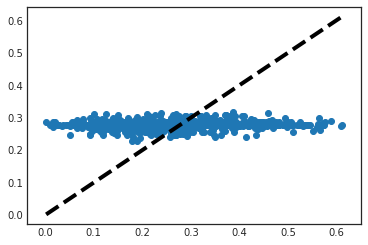

In [10]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

In [11]:
df.tissue.value_counts()

LGG     453
HNSC    408
THCA    398
LUAD    368
PRAD    287
STAD    234
LUSC    233
BLCA    187
PCPG    148
OV      134
GBM     131
KIRC    128
PAAD    104
KIRP     76
SKCM     68
UVM      58
UCS      49
CESC     37
Name: tissue, dtype: int64

In [12]:
cell_types = [u'B cells naive',
       u'B cells memory', u'Plasma cells', u'T cells CD8',
       u'T cells CD4 naive', u'T cells CD4 memory resting',
       u'T cells CD4 memory activated', u'T cells follicular helper',
       u'T cells regulatory (Tregs)', u'T cells gamma delta',
       u'NK cells resting', u'NK cells activated', u'Monocytes',
       u'Macrophages M0', u'Macrophages M1', u'Macrophages M2',
       u'Dendritic cells resting', u'Dendritic cells activated',
       u'Mast cells resting', u'Mast cells activated', u'Eosinophils',
       u'Neutrophils']

In [13]:
df.head()

,KIR3DL3,KIR3DP1,KIR2DL4,KIR3DL2,KIR2DP1,KIR2DL1,KIR2DS4,KIR2DS3,KIR2DS2,KIR2DS5,...,C2,A1_,A2_,B1_,B2_,C1_,C2_,activating,inhibitory,ratio
TCGA-02-0047,2,2,2,2,1,1,2,0,1,0,...,C*03,A*02:01,A*32:01,B*15:01,B*15:01,C*03:03,C*03:03,5,11,0.454545
TCGA-02-0055,2,2,2,2,1,1,2,0,1,0,...,C*15,A*11:01,A*31:01,B*51:01,B*55:01,C*03:03,C*15:02,5,11,0.454545
TCGA-02-2483,3,3,3,3,3,3,0,0,0,3,...,C*12,A*03:01,A*11:01,B*07:02,B*52:01,C*07:02,C*12:02,10,17,0.588235
TCGA-02-2485,2,2,2,2,2,2,2,0,0,0,...,C*16,A*03:01,A*29:02,B*44:04,B*49:01,C*07:01,C*16:01,4,12,0.333333
TCGA-02-2486,3,3,3,3,0,0,3,0,3,0,...,C*07,A*03:01,A*03:01,B*07:02,B*07:02,C*07:02,C*07:02,9,15,0.600000


In [14]:
df.columns

Index([u'KIR3DL3', u'KIR3DP1', u'KIR2DL4', u'KIR3DL2', u'KIR2DP1', u'KIR2DL1',
       u'KIR2DS4', u'KIR2DS3', u'KIR2DS2', u'KIR2DS5', u'KIR3DS1', u'KIR2DS1',
       u'KIR2DL2', u'KIR3DL1', u'KIR2DL3', u'KIR2DL5A', u'age_at_diagnosis',
       u'days_to_death', u'days_to_last_followup', u'ethnicity', u'gender',
       u'race', u'tissue', u'vital_status', u'B cells naive',
       u'B cells memory', u'Plasma cells', u'T cells CD8',
       u'T cells CD4 naive', u'T cells CD4 memory resting',
       u'T cells CD4 memory activated', u'T cells follicular helper',
       u'T cells regulatory (Tregs)', u'T cells gamma delta',
       u'NK cells resting', u'NK cells activated', u'Monocytes',
       u'Macrophages M0', u'Macrophages M1', u'Macrophages M2',
       u'Dendritic cells resting', u'Dendritic cells activated',
       u'Mast cells resting', u'Mast cells activated', u'Eosinophils',
       u'Neutrophils', u'P-value', u'Pearson Correlation', u'RMSE', u'Bcells',
       u'CAFs', u'CD4_Tcells', u

Text(0,0.5,'NK Cells')

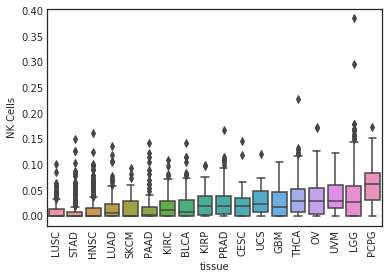

In [15]:
# 'LIHC', 'DLBC', 'ACC', 'BRCA', 'UCS', 'SKCM', 'LGG'
ordered_tissues = df.groupby('tissue')['NK cells activated'].mean().sort_values().index
sns.boxplot(x='tissue', y='NK cells activated', data=df, order=ordered_tissues)
plt.xticks(rotation=90)
plt.ylabel('NK Cells')
#plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration_by_tissue.nkcells.pdf')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

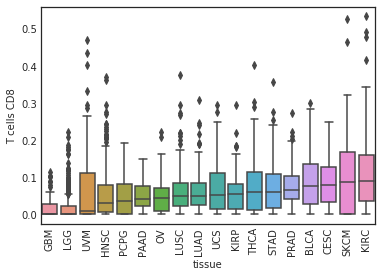

In [55]:
ordered_tissues = df.groupby('tissue')['T cells CD8'].median().sort_values().index
sns.boxplot(x='tissue', y='T cells CD8', data=df, order=ordered_tissues)
plt.xticks(rotation=90)
#plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration_by_tissue.tcells.pdf')

### Tissue agnostic

Activating/inhibitory

In [14]:
for cell in cell_types:
    if sp.spearmanr(df[cell], df.inhibitory)[1] < 0.05:
        print cell, sp.spearmanr(df[cell], df.inhibitory)

T cells CD4 naive SpearmanrResult(correlation=-0.04375155533600277, pvalue=0.009623778261700425)
Macrophages M1 SpearmanrResult(correlation=0.03977085680615653, pvalue=0.01860749430112782)


In [15]:
for cell in cell_types:
    if sp.spearmanr(df[cell], df.activating)[1] < 0.05:
        print cell, sp.spearmanr(df[cell], df.activating)

T cells CD8 SpearmanrResult(correlation=0.04169370901443645, pvalue=0.013618292171313036)
Dendritic cells activated SpearmanrResult(correlation=-0.037662181611555136, pvalue=0.02585133548649868)


Gene specific

In [5]:
genes = ['KIR3DL3', 'KIR3DP1', 'KIR2DL4', 'KIR3DL2', 'KIR2DS2', 'KIR2DS3', 'KIR2DP1', 
         'KIR2DL1', 'KIR3DS1', 'KIR2DS5', 'KIR2DS4']

In [6]:
cell_types = [u'T cells CD8', u'NK cells resting', u'NK cells activated']

In [21]:
predicted_total = 33
total = 0
for gene in genes:
    for cell in cell_types:
        if sp.spearmanr(df[cell], df[gene])[1] * predicted_total < 0.05:
            print gene, cell, sp.spearmanr(df[cell], df[gene])
        total += 1
print total

33


### Tissue dependent

Activating/inhibitory

In [23]:
predicted_total = 54
total = 0
for tissue in df.tissue.unique():
    t = df.tissue == tissue
    for cell in cell_types:
        if sp.spearmanr(df[t][cell], df[t].inhibitory)[1] * predicted_total < 0.05:
            print cell, sp.spearmanr(df[t][cell], df[t].inhibitory)
        total += 1
print total

GBM
OV
LUAD
PRAD
LUSC
PAAD
KIRC
KIRP
STAD
HNSC
SKCM
CESC
THCA
BLCA
LGG
UCS
PCPG
UVM
54


In [25]:
predicted_total = 12
total = 0
for tissue in df.tissue.unique():
    print tissue
    t = df.tissue == tissue
    for cell in cell_types:
        if sp.spearmanr(df[t][cell], df[t].activating)[1] * predicted_total < 0.05:
            print cell, sp.spearmanr(df[t][cell], df[t].activating)
        total += 1
print total

GBM
OV
LUAD
PRAD
LUSC
PAAD
KIRC
KIRP
STAD
HNSC
SKCM
CESC
THCA
BLCA
LGG
UCS
PCPG
UVM
54


In [27]:
predicted_total = 132
total = 0
for tissue in df.tissue.unique():
    print tissue
    t = df.tissue == tissue
    for cell in cell_types:
        for gene in genes:
            if sp.spearmanr(df[t][cell], df[t][gene])[1] * predicted_total < 0.05:
                print cell, gene, sp.spearmanr(df[t][cell], df[t][gene])[1] * predicted_total
            total += 1
print total

GBM
OV
LUAD
PRAD
LUSC
PAAD
KIRC
KIRP
STAD


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


HNSC
SKCM
CESC
THCA
BLCA
LGG
UCS
PCPG
UVM
594


### KIR/MHC combinations

In [7]:
hla_a = [x.split(',')[1:3] for x in open('/cellar/users/ramarty/Data/kir/biological/combinations.hla_a.csv').readlines()[1:]]
hla_b = [x.split(',')[1:3] for x in open('/cellar/users/ramarty/Data/kir/biological/combinations.hla_b.csv').readlines()[1:]]
hla_c = [x.split(',')[1:3] for x in open('/cellar/users/ramarty/Data/kir/biological/combinations.hla_c.csv').readlines()[1:]]

In [8]:
hla_a_single = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/biological/singles.A.txt').readlines()]
hla_b_single = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/biological/singles.B.txt').readlines()]
hla_c_single = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/biological/singles.C.txt').readlines()]

In [9]:
hla_a_single_fd = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/biological/singles.A.four_digit.txt').readlines()]
hla_b_single_fd = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/biological/singles.B.four_digit.txt').readlines()]
hla_c_single_fd = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/biological/singles.C.four_digit.txt').readlines()]

### Updated such as there is an indication of sample size!

In [34]:
import statsmodels.formula.api as smf

In [11]:
cell_types
df['TCD8'] = df['T cells CD8']
df['NKR'] = df['NK cells resting']
df['NKA'] = df['NK cells activated']
modified_cell_types = ['TCD8', 'NKR', 'NKA']

In [43]:
total = 0
predicted_total = 10
for gene in genes:
    for hla1, hla2 in hla_a:
        for cell in cell_types:
            h = (df.A1 == hla1)&(df.A2 == hla2)
            k = df[gene] > 1
            if len(df[k&h][cell]) > 5 and len(df[~(k&h)][cell]) > 5:
                total += 1
                if sp.ttest_ind(df[k&h][cell], df[~(k&h)][cell])[1] * predicted_total < 0.05:
                    print cell, gene, hla1, hla2, sp.ttest_ind(df[k&h][cell], df[~(k&h)][cell])
                    df['h'] = (df.A1 == hla1)&(df.A2 == hla2)
                    df['k'] = df[gene] > 1
                    est = smf.ols(formula='TCD8 ~ h + k + h*k', data=df).fit()
                    print est.pvalues
print total

T cells CD8 KIR2DS5 A*02 A*02 Ttest_indResult(statistic=2.859465547799815, pvalue=0.004268675201113367)
Intercept              0.000000
h[T.True]              0.544542
k[T.True]              0.534811
h[T.True]:k[T.True]    0.002910
dtype: float64
516


### Single HLAs

A

In [15]:
df.columns

Index([u'KIR3DL3', u'KIR3DP1', u'KIR2DL4', u'KIR3DL2', u'KIR2DP1', u'KIR2DL1',
       u'KIR2DS4', u'KIR2DS3', u'KIR2DS2', u'KIR2DS5', u'KIR3DS1', u'KIR2DS1',
       u'KIR2DL2', u'KIR3DL1', u'KIR2DL3', u'KIR2DL5A', u'age_at_diagnosis',
       u'days_to_death', u'days_to_last_followup', u'ethnicity', u'gender',
       u'race', u'tissue', u'vital_status', u'B cells naive',
       u'B cells memory', u'Plasma cells', u'T cells CD8',
       u'T cells CD4 naive', u'T cells CD4 memory resting',
       u'T cells CD4 memory activated', u'T cells follicular helper',
       u'T cells regulatory (Tregs)', u'T cells gamma delta',
       u'NK cells resting', u'NK cells activated', u'Monocytes',
       u'Macrophages M0', u'Macrophages M1', u'Macrophages M2',
       u'Dendritic cells resting', u'Dendritic cells activated',
       u'Mast cells resting', u'Mast cells activated', u'Eosinophils',
       u'Neutrophils', u'P-value', u'Pearson Correlation', u'RMSE', u'Bcells',
       u'CAFs', u'CD4_Tcells', u

In [17]:
df['Tcells'] = df['CD4_Tcells'] + df['CD8_Tcells']

In [18]:
predicted_total = 204
total = 0
for gene in genes:
    for hla in hla_a_single:
        for cell in ['NKcells', 'Tcells']:
            h = (df.A1 == hla)|(df.A2 == hla)
            k = df[gene] > 1
            if len(df[k&h][cell]) > 10 and len(df[~k&h][cell]) > 10:
                total += 1
                if (sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1]) * predicted_total < 0.05:
                    print cell, gene, hla, sp.ttest_ind(df[k&h][cell], df[~k&h][cell]), len(df[k&h]), len(df[~k&h])
                    f, ax = plt.subplots()
                    ax.violinplot([df[k&h][cell], df[~k&h][cell], df[k&~h][cell], df[~k&~h][cell]])
                    plt.ylim(0, 0.3)
                    plt.ylabel('Infiltration of {0}'.format(cell))
                    ax.set_xticklabels(['', 'High {0}/+'.format(gene), ' ', 'Low {0}/+'.format(gene), '', 'High {0}/-'.format(gene), ' ', 'Low {0}/-'.format(gene)])
                    plt.title('{0} - {1}'.format(hla, str(sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total)))
                    plt.xticks(rotation=45)
                    plt.show()
                    plt.clf()
print total

166


In [23]:
predicted_total = 30
total = 0
for hla in hla_a_single:
    for cell in ['NKcells', 'Tcells']:
        h = (df.A1 == hla)|(df.A2 == hla)
        if len(df[h][cell]) > 10 and len(df[~h][cell]) > 10:
            total += 1
            if sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total < 0.05:
                print cell, hla, sp.ttest_ind(df[h][cell], df[~h][cell]), len(df[h][cell]), len(df[~h][cell])
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[h][cell], df[~h][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                plt.ylim(0, 0.5)
                plt.ylabel('Infiltration of {0}'.format(cell))
                ax.set_xticklabels(['', '{0} - {1}'.format(hla, len(df[h][cell])), ' ', 'other - {0}'.format(len(df[~h][cell]))])
                plt.title(sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total)
                plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.pdf'.format(cell, hla))
                plt.show()
                plt.clf()
print total

30


B

Tcells KIR2DS3 B*08 Ttest_indResult(statistic=3.9444865994660354, pvalue=0.00010114734396274137) 19 263
19


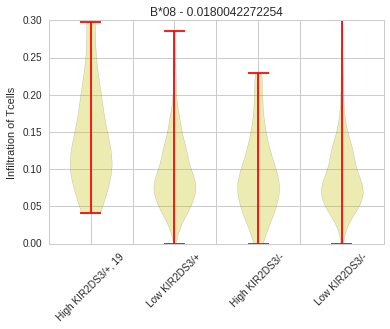

178


In [46]:
predicted_total = 178
total = 0
for gene in genes:
    for hla in hla_b_single:
        for cell in ['NKcells', 'Tcells']:
            h = (df.B1 == hla)|(df.B2 == hla)
            k = df[gene] > 1
            if len(df[k&h][cell]) > 10 and len(df[~k&h][cell]) > 10:
                total += 1
                if (sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1]) * predicted_total < 0.05:
                    print cell, gene, hla, sp.ttest_ind(df[k&h][cell], df[~k&h][cell]), len(df[k&h]), len(df[~k&h])
                    f, ax = plt.subplots()
                    ax.violinplot([df[k&h][cell], df[~k&h][cell], df[k&~h][cell], df[~k&~h][cell]])
                    plt.ylim(0, 0.3)
                    plt.ylabel('Infiltration of {0}'.format(cell))
                    print len(df[k&h][cell])
                    ax.set_xticklabels(['', 'High {0}/+, {1}'.format(gene, len(df[k&h])), ' ', 'Low {0}/+'.format(gene), '', 'High {0}/-'.format(gene), ' ', 'Low {0}/-'.format(gene)])
                    plt.xticks(rotation=45)
                    plt.title('{0} - {1}'.format(hla, str(sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total)))
                    plt.show()
                    plt.clf()
print total

Tcells B*27 Ttest_indResult(statistic=4.2518771750079631, pvalue=2.2727329972033734e-05) 85 1206


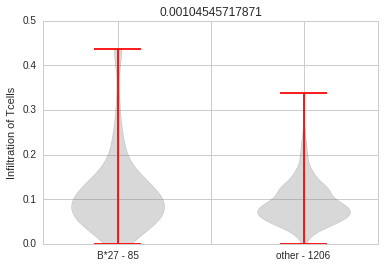

46


In [45]:
predicted_total = 46
total = 0
for hla in hla_b_single:
    for cell in ['NKcells', 'Tcells']:
        h = (df.B1 == hla)|(df.B2 == hla)
        if len(df[h][cell]) > 10 and len(df[~h][cell]) > 10:
            total += 1
            if sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total < 0.05:
                print cell, hla, sp.ttest_ind(df[h][cell], df[~h][cell]), len(df[h][cell]), len(df[~h][cell])
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[h][cell], df[~h][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                plt.ylim(0, 0.5)
                plt.ylabel('Infiltration of {0}'.format(cell))
                ax.set_xticklabels(['', '{0} - {1}'.format(hla, len(df[h][cell])), ' ', 'other - {0}'.format(len(df[~h][cell]))])
                plt.title(sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total)
                plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.pdf'.format(cell, hla))
                plt.show()
                plt.clf()
print total

C

Tcells KIR3DS1 C*03 Ttest_indResult(statistic=4.9544631908054297, pvalue=1.3404632079738458e-06) 12 239
12


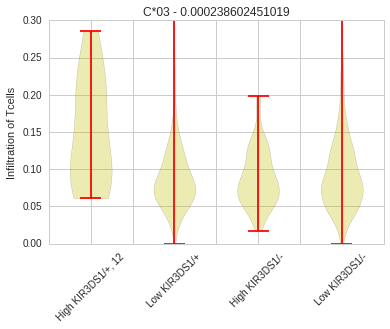

138


In [47]:
predicted_total = 178
total = 0
for gene in genes:
    for hla in hla_c_single:
        for cell in ['NKcells', 'Tcells']:
            h = (df.C1 == hla)|(df.C2 == hla)
            k = df[gene] > 1
            if len(df[k&h][cell]) > 10 and len(df[~k&h][cell]) > 10:
                total += 1
                if (sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1]) * predicted_total < 0.05:
                    print cell, gene, hla, sp.ttest_ind(df[k&h][cell], df[~k&h][cell]), len(df[k&h]), len(df[~k&h])
                    f, ax = plt.subplots()
                    ax.violinplot([df[k&h][cell], df[~k&h][cell], df[k&~h][cell], df[~k&~h][cell]])
                    plt.ylim(0, 0.3)
                    plt.ylabel('Infiltration of {0}'.format(cell))
                    print len(df[k&h][cell])
                    ax.set_xticklabels(['', 'High {0}/+, {1}'.format(gene, len(df[k&h])), ' ', 'Low {0}/+'.format(gene), '', 'High {0}/-'.format(gene), ' ', 'Low {0}/-'.format(gene)])
                    plt.xticks(rotation=45)
                    plt.title('{0} - {1}'.format(hla, str(sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total)))
                    plt.show()
                    plt.clf()
print total

NKcells C*17 Ttest_indResult(statistic=3.4949837414707678, pvalue=0.00049017186476192837) 40 1251


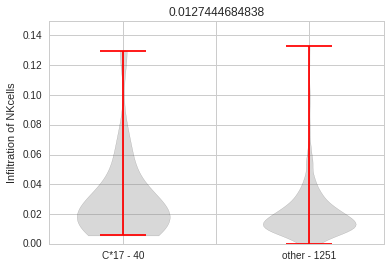

26


In [50]:
predicted_total = 26
total = 0
for hla in hla_c_single:
    for cell in ['NKcells', 'Tcells']:
        h = (df.C1 == hla)|(df.C2 == hla)
        if len(df[h][cell]) > 10 and len(df[~h][cell]) > 10:
            total += 1
            if sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total < 0.05:
                print cell, hla, sp.ttest_ind(df[h][cell], df[~h][cell]), len(df[h][cell]), len(df[~h][cell])
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[h][cell], df[~h][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                plt.ylim(0, 0.15)
                plt.ylabel('Infiltration of {0}'.format(cell))
                ax.set_xticklabels(['', '{0} - {1}'.format(hla, len(df[h][cell])), ' ', 'other - {0}'.format(len(df[~h][cell]))])
                plt.title(sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total)
                plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.pdf'.format(cell, hla))
                plt.show()
                plt.clf()
print total

###HLA pairs

In [40]:
# plot all four options high/high, low/high, etc. 

predicted_total = 138
total = 0
for gene in genes:
    for hla1, hla2 in hla_a:
        for cell in ['NKcells', 'Tcells']:
            h = (df.A1 == hla1)&(df.A2 == hla2)
            k = df[gene] > 1
            if len(df[k&h][cell]) > 5 and len(df[~k&h][cell]) > 5:
                total += 1
                if (sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1]) * predicted_total < 0.05:
                    print cell, gene, hla1, hla2, sp.ttest_ind(df[k&h][cell], df[~k&h][cell]), len(df[k&h]), len(df[~k&h])
                    f, ax = plt.subplots()
                    ax.violinplot([df[k&h][cell], df[~k&h][cell], df[k&~h][cell], df[~k&~h][cell]])
                    plt.ylim(0, 0.3)
                    plt.ylabel('Infiltration of {0}'.format(cell))
                    ax.set_xticklabels(['', 'High {0}/+'.format(gene), ' ', 'Low {0}/+'.format(gene), '', 'High {0}/-'.format(gene), ' ', 'Low {0}/-'.format(gene)])
                    plt.title('{0},{1} - {2}'.format(hla1, hla2, str(sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total)))
                    plt.show()
                    plt.clf()
print total

142


In [56]:
# original

predicted_total = 138
total = 0
for gene in genes:
    for hla1, hla2 in hla_a:
        for cell in ['NKcells', 'Tcells']:
            h = (df.A1 == hla1)&(df.A2 == hla2)
            k = df[gene] > 1
            if len(df[k&h][cell]) > 5 and len(df[~k&h][cell]) > 5:
                total += 1
                if (sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1]) * predicted_total < 0.05:
                    print cell, gene, hla1, hla2, sp.ttest_ind(df[k&h][cell], df[~k&h][cell]), len(df[k&h]), len(df[~k&h])
                    f, ax = plt.subplots()
                    ax.violinplot([df[k&h][cell], df[~k&h][cell]])
                    plt.ylim(0, 0.3)
                    plt.ylabel('Infiltration of {0}'.format(cell))
                    ax.set_xticklabels(['', 'High {0}'.format(gene), ' ', 'Low {0}'.format(gene)])
                    plt.title('{0},{1} - {2}'.format(hla1, hla2, str(sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total)))
                    plt.show()
                    plt.clf()
print total

142


Tcells A*02 A*25 Ttest_indResult(statistic=6.3734706236345939, pvalue=2.5674288371667205e-10) 24 1267


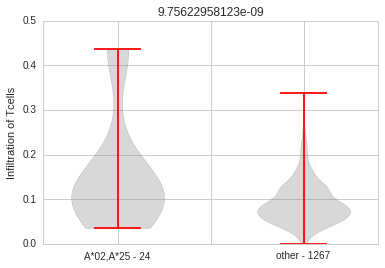

38


In [42]:
predicted_total = 38
total = 0
for hla1, hla2 in hla_a:
    for cell in ['NKcells', 'Tcells']:
        h = (df.A1 == hla1)&(df.A2 == hla2)
        if len(df[h][cell]) > 10 and len(df[~h][cell]) > 10:
            total += 1
            if sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total < 0.05:
                print cell, hla1, hla2, sp.ttest_ind(df[h][cell], df[~h][cell]), len(df[h][cell]), len(df[~h][cell])
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[h][cell], df[~h][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                plt.ylim(0, 0.5)
                plt.ylabel('Infiltration of {0}'.format(cell))
                ax.set_xticklabels(['', '{0},{1} - {2}'.format(hla1, hla2, len(df[h][cell])), ' ', 'other - {0}'.format(len(df[~h][cell]))])
                plt.title(sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total)
                plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, hla1, hla2))
                plt.show()
                plt.clf()
print total

In [43]:
predicted_total = 78
total = 0
for gene in genes:
    for hla1, hla2 in hla_b:
        for cell in ['NKcells', 'Tcells']:
            h = (df.B1 == hla1)&(df.B2 == hla2)
            k = df[gene] > 1
            if len(df[k&h][cell]) > 5 and len(df[~k&h][cell]) > 5:
                total += 1
                if sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total < 0.05:
                    print cell, gene, hla1, hla2, sp.ttest_ind(df[k&h][cell], df[~k&h][cell])
print total

80


NKcells B*44 B*44 Ttest_indResult(statistic=3.2026337437321328, pvalue=0.0013950628545790547) 27 1264


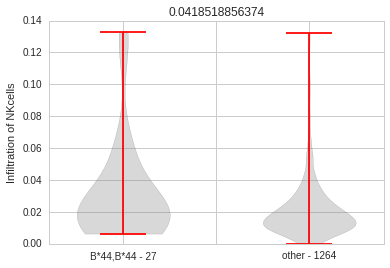

30


In [53]:
predicted_total = 30
total = 0
for hla1, hla2 in hla_b:
    for cell in ['NKcells', 'Tcells']:
        h = (df.B1 == hla1)&(df.B2 == hla2)
        total += 1
        if sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total < 0.05:
            print cell, hla1, hla2, sp.ttest_ind(df[h][cell], df[~h][cell]), len(df[h][cell]), len(df[~h][cell])
            f, ax = plt.subplots()
            violin_parts = ax.violinplot([df[h][cell], df[~h][cell]])
            for pc in violin_parts['bodies']:
                pc.set_facecolor('grey')
                pc.set_edgecolor('black')
            #plt.ylim(0, 0.5)
            plt.ylabel('Infiltration of {0}'.format(cell))
            ax.set_xticklabels(['', '{0},{1} - {2}'.format(hla1, hla2, len(df[h][cell])), ' ', 'other - {0}'.format(len(df[~h][cell]))])
            plt.title(sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total)
            plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, hla1, hla2))
            plt.show()
            plt.clf()
print total

Tcells KIR3DS1 C*03 C*07 0.0375562604819 6 74


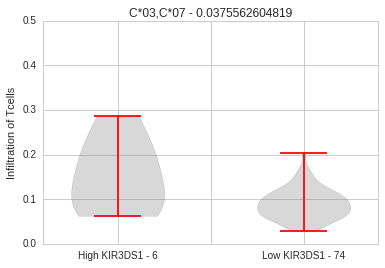

138


In [55]:
predicted_total = 138
total = 0
for gene in genes:
    for hla1, hla2 in hla_c:
        for cell in ['NKcells', 'Tcells']:
            h = (df.C1 == hla1)&(df.C2 == hla2)
            k = df[gene] > 1
            if len(df[k&h][cell]) > 5 and len(df[~k&h][cell]) > 5:
                total += 1
                if sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total < 0.05:
                    print cell, gene, hla1, hla2, sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total, len(df[k&h]), len(df[~k&h])
                    f, ax = plt.subplots()
                    violin_parts = ax.violinplot([df[k&h][cell], df[~k&h][cell]])
                    for pc in violin_parts['bodies']:
                        pc.set_facecolor('grey')
                        pc.set_edgecolor('black')
                    plt.ylim(0, 0.5)
                    plt.ylabel('Infiltration of {0}'.format(cell))
                    ax.set_xticklabels(['', 'High {0} - {1}'.format(gene, len(df[k&h])), ' ', 'Low {0} - {1}'.format(gene, len(df[~k&h]))])
                    plt.title('{0},{1} - {2}'.format(hla1, hla2, sp.ttest_ind(df[k&h][cell], df[~k&h][cell])[1] * predicted_total))
                    plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.kir_hla.{0}.{1}.{2}.{3}.pdf'.format(cell, gene, hla1, hla2))
                    plt.show()
                    plt.clf()
print total

Tcells C*02 C*07 Ttest_indResult(statistic=3.9421265284841387, pvalue=8.5101318104669502e-05) 56 1235


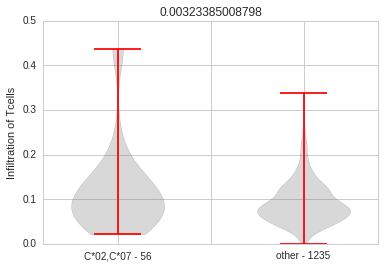

38


In [51]:
predicted_total = 38
total = 0
for hla1, hla2 in hla_c:
    for cell in ['NKcells', 'Tcells']:
        h = (df.C1 == hla1)&(df.C2 == hla2)
        total += 1
        if sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total < 0.05:
            print cell, hla1, hla2, sp.ttest_ind(df[h][cell], df[~h][cell]), len(df[h][cell]), len(df[~h][cell])
            f, ax = plt.subplots()
            violin_parts = ax.violinplot([df[h][cell], df[~h][cell]])
            for pc in violin_parts['bodies']:
                pc.set_facecolor('grey')
                pc.set_edgecolor('black')
            plt.ylim(0, 0.5)
            plt.ylabel('Infiltration of {0}'.format(cell))
            ax.set_xticklabels(['', '{0},{1} - {2}'.format(hla1, hla2, len(df[h][cell])), ' ', 'other - {0}'.format(len(df[~h][cell]))])
            plt.title(sp.ttest_ind(df[h][cell], df[~h][cell])[1] * predicted_total)
            plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, hla1, hla2))
            plt.show()
            plt.clf()
print total

### KIR/MHC combinations - stratified by tissue

0
0
9
12
12
12
12
12
12
27
27
27
TCD8 KIR2DS4 A*01 A*02 Ttest_indResult(statistic=-3.780024194355691, pvalue=0.0007554824432749403) 17 13


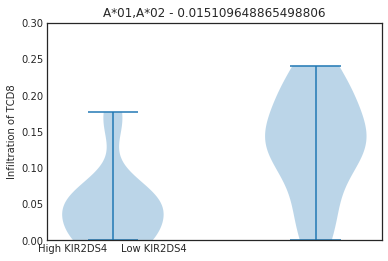

42
42
69
69
69
69


<Figure size 432x288 with 0 Axes>

In [13]:
predicted_total = 20
total = 0
for tissue in df.tissue.unique():
    t = df.tissue == tissue
    for gene in genes:
        for hla1, hla2 in hla_a:
            for cell in modified_cell_types:
                h = (df.A1 == hla1)&(df.A2 == hla2)
                k = df[gene] > 1
                if len(df[k&h&t][cell]) > 10 and len(df[~k&h&t][cell]) > 10:
                    total += 1
                    if (sp.ttest_ind(df[k&h&t][cell], df[~k&h&t][cell])[1]) * predicted_total < 0.05:
                        print cell, gene, hla1, hla2, sp.ttest_ind(df[k&h&t][cell], df[~k&h&t][cell]), len(df[k&h&t]), len(df[~k&h&t])
                        f, ax = plt.subplots()
                        ax.violinplot([df[k&h&t][cell], df[~k&h&t][cell]])
                        plt.ylim(0, 0.3)
                        plt.ylabel('Infiltration of {0}'.format(cell))
                        ax.set_xticklabels(['', 'High {0}'.format(gene), '              ', 'Low {0}'.format(gene)])
                        plt.title('{0},{1} - {2}'.format(hla1, hla2, str(sp.ttest_ind(df[k&h&t][cell], df[~k&h&t][cell])[1] * predicted_total)))
                        plt.show()
                        plt.clf()
    print total

### Known binders

In [48]:
bw4 = ['B*05', 'B*13', 'B*17', 'B*27', 'B*37', 'B*38', 'B*44', 'B*47', 'B*49', 'B*51', 
       'B*52', 'B*53', 'B*57', 'B*58', 'B*59', 'B*63', 'B*77', 'A*09', 'A*23', 'A*24',
       'A*24', 'A*25', 'A*32']

In [49]:
def categorize_bw4(x):
    return in_bw4(x[0]) + in_bw4(x[1]) + in_bw4(x[2]) + in_bw4(x[3])
def in_bw4(x):
    if x in bw4:
        return 1
    else:
        return 0 
df['bw4'] = df[['A1', 'A2', 'B1', 'B2']].apply(categorize_bw4, axis=1)

In [50]:
activating_combo1 = (df.KIR3DS1 > 0) & (df.bw4 > 0)
activating_combo2 = (df.KIR2DS1 > 0) & ((df.C1 == 'C*02')&(df.C2 == 'C*02')|(df.C1 == 'C*01')&(df.C2 == 'C*02')|(df.C1 == 'C*02')&(df.C2 == 'C*01'))
activating_combo3 = (df.KIR2DS2 > 0) & ((df.C1 == 'C*01')&(df.C2 == 'C*01')|(df.C1 == 'C*01')&(df.C2 == 'C*02')|(df.C1 == 'C*02')&(df.C2 == 'C*01'))

In [51]:
inactivating_combo1 = (df.KIR3DL1 > 0) & (df.bw4 > 0)
inactivating_combo2 = (df.KIR2DL1 > 0) & ((df.C1 == 'C*02')&(df.C2 == 'C*02')|(df.C1 == 'C*01')&(df.C2 == 'C*02')|(df.C1 == 'C*02')&(df.C2 == 'C*01'))
inactivating_combo3 = (df.KIR2DL2 > 0) & ((df.C1 == 'C*01')&(df.C2 == 'C*01')|(df.C1 == 'C*01')&(df.C2 == 'C*02')|(df.C1 == 'C*02')&(df.C2 == 'C*01'))
inactivating_combo4 = (df.KIR2DL3 > 0) & ((df.C1 == 'C*01')&(df.C2 == 'C*01')|(df.C1 == 'C*01')&(df.C2 == 'C*02')|(df.C1 == 'C*02')&(df.C2 == 'C*01'))

In [52]:
df['NKcells'] = df['NK cells activated'] + df['NK cells resting']
df['Tcells'] = df['T cells CD8']

In [55]:
# test for infiltration differences between activating and inactivating; separately and together
predicted_total = 2
total = 0
for inactivating_combo in [inactivating_combo1, inactivating_combo2, inactivating_combo3, inactivating_combo4]:
    for cell in modified_cell_types:
        print len(df[inactivating_combo]), len(df[~inactivating_combo])
        if len(df[inactivating_combo][cell]) > 10 and len(df[~inactivating_combo][cell]) > 10:
            total += 1
            test = sp.ttest_ind(df[inactivating_combo][cell], df[~inactivating_combo][cell])[1]
            # test one against all others
            if test * predicted_total < 0.05:
                print cell, len(df[inactivating_combo]), len(df[~inactivating_combo])
                print df[inactivating_combo][cell].median(), df[~inactivating_combo][cell].median()
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[inactivating_combo][cell], df[~inactivating_combo][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                #ax.boxplot([df[inactivating_combo][cell], df[~inactivating_combo][cell]])
                #plt.ylim(0, 0.05)
                plt.ylabel('Infiltration of {0}'.format(cell))
                ax.set_xticklabels([' ', 'Inactivating - {0}'.format(len(df[inactivating_combo])), ' ', 'Non-inactivating - {0}'.format(len(df[~inactivating_combo]))])
                plt.title('KIR3DL1,Bw4 - {0}'.format(str(test * predicted_total)))
                plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, 'KIR3DL1', 'Bw4'))
                plt.show()
                plt.clf()
print total

2443 1058
2443 1058
2443 1058
19 3482
19 3482
19 3482
7 3494
7 3494
7 3494
14 3487
14 3487
14 3487
9


In [54]:
genes

['KIR3DL3',
 'KIR3DP1',
 'KIR2DL4',
 'KIR3DL2',
 'KIR2DS2',
 'KIR2DS3',
 'KIR2DP1',
 'KIR2DL1',
 'KIR3DS1',
 'KIR2DS5',
 'KIR2DS4']

In [56]:
binding_pairs_A = [['A*23:01', 'KIR3DL1'], ['A*03:01', 'KIR3DL2'], ['A*23:04', 'KIR3DL1'], ['A*23:02', 'KIR3DL1']]

In [57]:
binding_pairs_B =  [['B*53:01', 'KIR3DL1'], ['B*52:01', 'KIR3DL1'], ['B*44:03', 'KIR3DL1'], ['B*58:01', 'KIR3DL1'],
                 ['B*15:16', 'KIR3DL1'], ['B*49:01', 'KIR3DL1'], ['B*51:16', 'KIR3DL1'], ['B*57:04', 'KIR3DL1']]

In [58]:
binding_pairs_C = [['C*04:01', ['KIR2DL1', 'KIR2DS1', 'KIR2DL2', 'KIR2DL3', 'KIR2DS4']], 
                   ['C*16:01', ['KIR2DL2', 'KIR2DL3', 'KIR2DS4', 'KIR2DS4']], 
                   #['C*17:01', ['KIR2DL1', 'KIR2DS1', 'KIR2DL2', 'KIR2DL3']], 
                   ['C*17:01', ['KIR2DL1', 'KIR2DL2', 'KIR2DL3']], 
                   #['C*02:02', ['KIR2DL1', 'KIR2DS1', 'KIR2DL2', 'KIR2DL3', 'KIR2DS4']],
                   ['C*02:02', ['KIR2DL1', 'KIR2DL2', 'KIR2DL3']],
                   ['C*02:02', ['KIR2DS1', 'KIR2DS4']],
                   ['C*03:04', ['KIR2DL2', 'KIR2DL3']], 
                   ['C*07:01', ['KIR2DL2', 'KIR2DL3']],
                   ['C*07:02', ['KIR2DL2', 'KIR2DL3']], 
                   ['C*03:02', ['KIR2DL2', 'KIR2DL3']],
                   ['C*18:01', ['KIR2DL1', 'KIR2DS1', 'KIR2DL2']], 
                   ['C*18:02', ['KIR2DL2', 'KIR2DL3']]]

In [59]:
df.head()

,KIR3DL3,KIR3DP1,KIR2DL4,KIR3DL2,KIR2DP1,KIR2DL1,KIR2DS4,KIR2DL5,KIR2DS3,KIR2DS2,...,inhibitory,ratio,h,k,TCD8,NKR,NKA,bw4,NKcells,Tcells
TCGA-02-0047,2,2,2,2,1,1,2,0,0,1,...,11,0.454545,False,False,0.000000,0.000000,0.055265,1,0.055265,0.000000
TCGA-02-0055,2,2,2,2,1,1,2,0,0,1,...,11,0.454545,False,False,0.056440,0.000000,0.033468,1,0.033468,0.056440
TCGA-02-2483,2,2,1,2,3,3,0,1,0,0,...,11,0.636364,False,True,0.032124,0.006752,0.076858,1,0.083610,0.032124
TCGA-02-2485,2,2,2,2,2,2,2,0,0,0,...,12,0.333333,False,False,0.000000,0.021965,0.000000,2,0.021965,0.000000
TCGA-02-2486,3,3,2,3,0,0,3,0,0,3,...,14,0.571429,False,False,0.051232,0.017476,0.000000,0,0.017476,0.051232


In [61]:
predicted_total = 2
total = 0
for binding_pair in binding_pairs_A:
    for cell in ['NKcells', 'Tcells']:
        hla_allele = binding_pair[0]
        kir_gene = binding_pair[1]
        hla = (df.A1_ == hla_allele) | (df.A2_ == hla_allele)
        kir = (df[kir_gene] > 1)
        print len(df[hla&kir]), len(df[hla&~kir])
        if len(df[hla&kir][cell]) > 10 and len(df[hla&~kir][cell]) > 10:
            total += 1
            test = sp.ttest_ind(df[hla&kir][cell], df[hla&~kir][cell])[1]
            #print hla_allele, kir_gene, test
            # test one against all others
            if test * predicted_total < 0.05:
                print cell, len(df[hla&kir]), len(df[hla&~kir])
                print df[hla&kir][cell].median(), df[hla&~kir][cell].median()
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[hla&kir][cell], df[hla&~kir][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                #ax.boxplot([df[inactivating_combo][cell], df[~inactivating_combo][cell]])
                #plt.ylim(0, 0.05)
                plt.ylabel('Infiltration of {0}'.format(cell))
                #ax.set_xticklabels([' ', 'Inactivating - {0}'.format(len(df[inactivating_combo])), ' ', 'Non-inactivating - {0}'.format(len(df[~inactivating_combo]))])
                plt.title('KIR3DL1,Bw4 - {0}'.format(str(test * predicted_total)))
                #plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, 'KIR3DL1', 'Bw4'))
                plt.show()
                plt.clf()
print total

98 73
98 73
798 18
798 18
0 0
0 0
0 0
0 0
4


In [63]:
predicted_total = 2
total = 0
for binding_pair in binding_pairs_B:
    for cell in ['NKcells', 'Tcells']:
        hla_allele = binding_pair[0]
        kir_gene = binding_pair[1]
        hla = (df.B1_ == hla_allele) | (df.B2_ == hla_allele)
        kir = (df[kir_gene] > 1)
        print len(df[hla&kir]), len(df[hla&~kir])
        if len(df[hla&kir][cell]) > 10 and len(df[hla&~kir][cell]) > 10:
            total += 1
            test = sp.ttest_ind(df[hla&kir][cell], df[hla&~kir][cell])[1]
            print hla_allele, kir_gene, test
            # test one against all others
            if test * predicted_total < 0.05:
                #print cell, len(df[hla&kir]), len(df[hla&~kir])
                #print df[hla&kir][cell].median(), df[hla&~kir][cell].median()
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[hla&kir][cell], df[hla&~kir][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                #ax.boxplot([df[inactivating_combo][cell], df[~inactivating_combo][cell]])
                #plt.ylim(0, 0.05)
                plt.ylabel('Infiltration of {0}'.format(cell))
                #ax.set_xticklabels([' ', 'Inactivating - {0}'.format(len(df[inactivating_combo])), ' ', 'Non-inactivating - {0}'.format(len(df[~inactivating_combo]))])
                plt.title('KIR3DL1,Bw4 - {0}'.format(str(test * predicted_total)))
                #plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, 'KIR3DL1', 'Bw4'))
                plt.show()
                plt.clf()
print total

41 18
B*53:01 KIR3DL1 0.5730387851126515
41 18
B*53:01 KIR3DL1 0.9890365048036899
54 48
B*52:01 KIR3DL1 0.7352341927518815
54 48
B*52:01 KIR3DL1 0.9111728436420605
196 122
B*44:03 KIR3DL1 0.842055724932614
196 122
B*44:03 KIR3DL1 0.694779545128724
40 24
B*58:01 KIR3DL1 0.9255024205020411
40 24
B*58:01 KIR3DL1 0.5770063259778859
15 9
15 9
61 50
B*49:01 KIR3DL1 0.25291892120032433
61 50
B*49:01 KIR3DL1 0.36245074237886066
0 0
0 0
0 0
0 0
10


748 2753
NKcells C*04:01 ['KIR2DL1', 'KIR2DS1', 'KIR2DL2', 'KIR2DL3', 'KIR2DS4'] 0.6798747326455622
0.0449188869231 0.044012730558
748 2753
Tcells C*04:01 ['KIR2DL1', 'KIR2DS1', 'KIR2DL2', 'KIR2DL3', 'KIR2DS4'] 0.5038440422644335
0.0444496126634 0.0419662208661
223 3278
NKcells C*16:01 ['KIR2DL2', 'KIR2DL3', 'KIR2DS4', 'KIR2DS4'] 0.9738593466650853
0.0440480854227 0.0445337871757
223 3278
Tcells C*16:01 ['KIR2DL2', 'KIR2DL3', 'KIR2DS4', 'KIR2DS4'] 0.6665725586070455
0.0411547792986 0.0429193606024
86 3415
NKcells C*17:01 ['KIR2DL1', 'KIR2DL2', 'KIR2DL3'] 0.42986673195520686
0.0489106445618 0.0443284813747
86 3415
Tcells C*17:01 ['KIR2DL1', 'KIR2DL2', 'KIR2DL3'] 0.695075877837943
0.0514732510122 0.0422869083381
268 3233
NKcells C*02:02 ['KIR2DL1', 'KIR2DL2', 'KIR2DL3'] 0.061665206894907905
0.0427546481136 0.0446067458429
268 3233
Tcells C*02:02 ['KIR2DL1', 'KIR2DL2', 'KIR2DL3'] 0.9444736918979784
0.0462662060216 0.0421574797763
268 3233
NKcells C*02:02 ['KIR2DS1', 'KIR2DS4'] 0.061665206

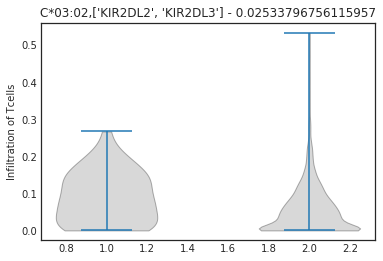

19 3482
NKcells C*18:01 ['KIR2DL1', 'KIR2DS1', 'KIR2DL2'] 0.37095340981893976
0.0459944623073 0.0445051502172
19 3482
Tcells C*18:01 ['KIR2DL1', 'KIR2DS1', 'KIR2DL2'] 0.44379642932380947
0.0220749900243 0.0428102629701
0 3501
0 3501
20


<Figure size 432x288 with 0 Axes>

In [64]:
predicted_total = 12
total = 0
for binding_pair in binding_pairs_C:
    for cell in ['NKcells', 'Tcells']:
        hla_allele = binding_pair[0]
        kir_gene = binding_pair[1]
        hla = (df.C1_ == hla_allele) | (df.C2_ == hla_allele)
        greater_than_value = 0
        try:
            kir = (df[kir_gene[0]] > greater_than_value) | (df[kir_gene[1]] > greater_than_value) | (df[kir_gene[2]] > greater_than_value) | (df[kir_gene[3]] > greater_than_value) | (df[kir_gene[4]] > greater_than_value)
        except:
            try:
                kir = (df[kir_gene[0]] > greater_than_value) | (df[kir_gene[1]] > greater_than_value) | (df[kir_gene[2]] > greater_than_value) | (df[kir_gene[3]] > greater_than_value) 
            except:
                try:
                    kir = (df[kir_gene[0]] > greater_than_value) | (df[kir_gene[1]] > greater_than_value) | (df[kir_gene[2]] > greater_than_value) 
                except:
                    kir = (df[kir_gene[0]] > greater_than_value) | (df[kir_gene[1]] > greater_than_value)
                
        print len(df[hla&kir]), len(df[~(hla&kir)])
        if len(df[hla&kir][cell]) > 10 and len(df[~(hla&kir)][cell]) > 10:
            total += 1
            test = sp.ttest_ind(df[hla&kir][cell], df[~(hla&kir)][cell])[1]
            print cell, hla_allele, kir_gene, test
            print df[hla&kir][cell].median(), df[~(hla&kir)][cell].median()
            # test one against all others
            if test * predicted_total < 0.05:
                #print cell, len(df[hla&kir]), len(df[~(hla&kir)])
                #print df[hla&kir][cell].median(), df[~(hla&kir)][cell].median()
                f, ax = plt.subplots()

                tmp_df = pd.DataFrame({'binding': ['yes' for x in list(df[hla&kir][cell])] + ['no' for x in list(df[~(hla&kir)][cell])],
                                       'infiltration': list(df[hla&kir][cell]) + list(df[~(hla&kir)][cell])})
                #ax = sns.boxplot(x='binding', y='infiltration', data=tmp_df)
                #ax = sns.violinplot(x='binding', y='infiltration', data=tmp_df)
                #ax = sns.stripplot(x='binding', y='infiltration', data=tmp_df, jitter=True, color=".3")
                
                violin_parts = ax.violinplot([df[hla&kir][cell], df[~(hla&kir)][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                #ax.boxplot([df[hla&kir][cell], df[~(hla&kir)][cell]])
                #plt.ylim(0, 0.05)
                plt.ylabel('Infiltration of {0}'.format(cell))
                #ax.set_xticklabels([' ', 'Inactivating - {0}'.format(len(df[inactivating_combo])), ' ', 'Non-inactivating - {0}'.format(len(df[~inactivating_combo]))])
                plt.title('{0},{1} - {2}'.format(hla_allele, kir_gene, str(test * predicted_total)))
                #plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.{0}.{1}.{2}.pdf'.format(cell, hla_allele, kir_gene[0]))
                plt.show()
                plt.clf()
print total

Testing novel interactions?

NKcells 75 3426
0.0541127411243 0.0441968984416


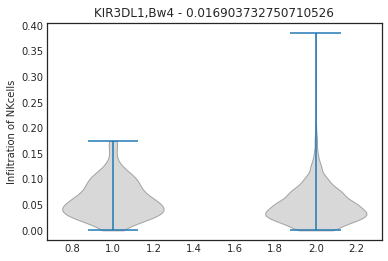

NKcells 209 3292
0.051536096841 0.0440392360606


<Figure size 432x288 with 0 Axes>

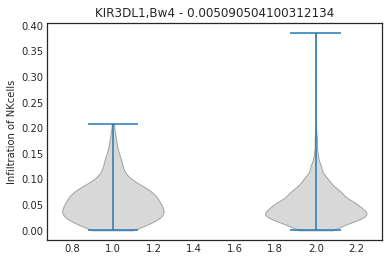

NKcells 208 3293
0.0516034123036 0.0440303866984


<Figure size 432x288 with 0 Axes>

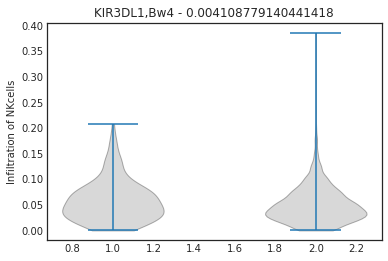

NKcells 208 3293
0.0516034123036 0.0440303866984


<Figure size 432x288 with 0 Axes>

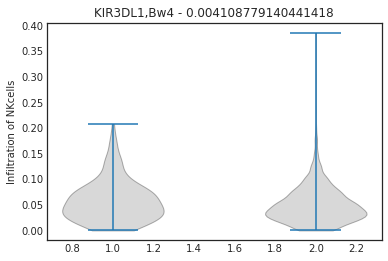

NKcells 209 3292
0.051536096841 0.0440392360606


<Figure size 432x288 with 0 Axes>

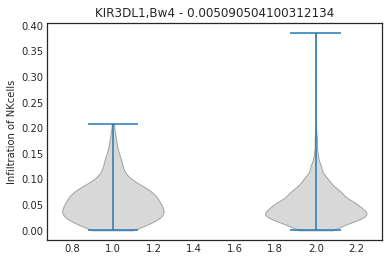

NKcells 119 3382
0.0520201164662 0.0441688371362


<Figure size 432x288 with 0 Axes>

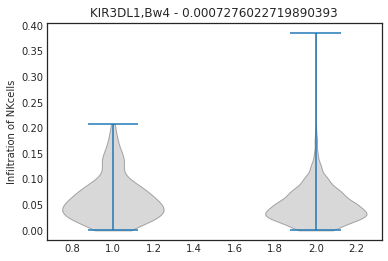

NKcells 67 3434
0.0590399207466 0.0443235897186


<Figure size 432x288 with 0 Axes>

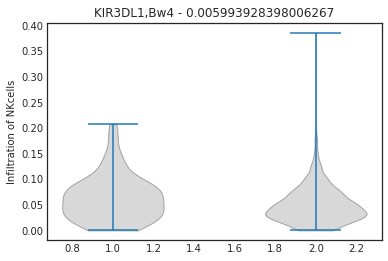

NKcells 200 3301
0.0513503430664 0.0440480854227


<Figure size 432x288 with 0 Axes>

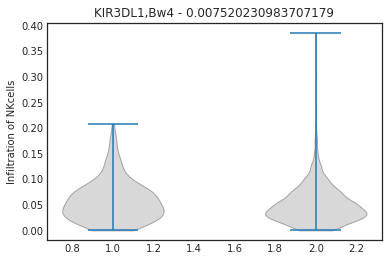

NKcells 199 3302
0.051536096841 0.0440392360606


<Figure size 432x288 with 0 Axes>

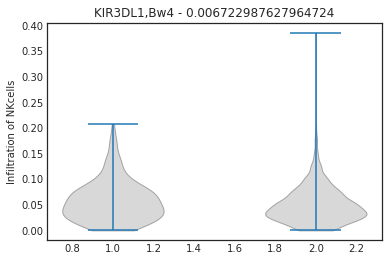

NKcells 199 3302
0.0526157508391 0.044018327289


<Figure size 432x288 with 0 Axes>

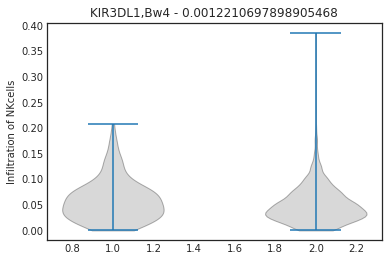

NKcells 122 3379
0.0521625383063 0.0441637014017


<Figure size 432x288 with 0 Axes>

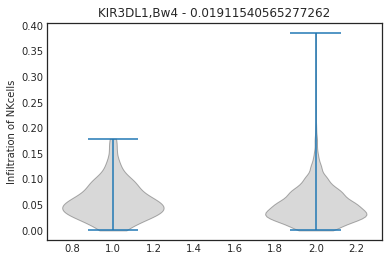

NKcells 122 3379
0.0521625383063 0.0441637014017


<Figure size 432x288 with 0 Axes>

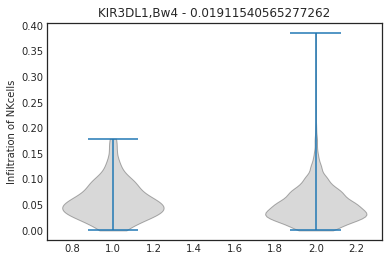

NKcells 122 3379
0.0521625383063 0.0441637014017


<Figure size 432x288 with 0 Axes>

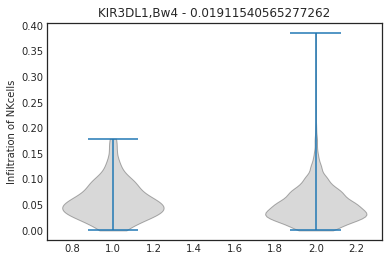

NKcells 122 3379
0.0521625383063 0.0441637014017


<Figure size 432x288 with 0 Axes>

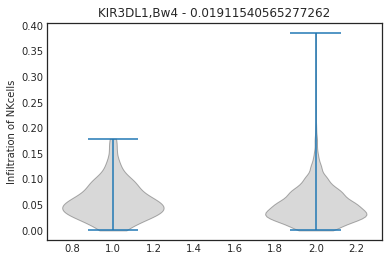

NKcells 62 3439
0.0556166594264 0.0442041399018


<Figure size 432x288 with 0 Axes>

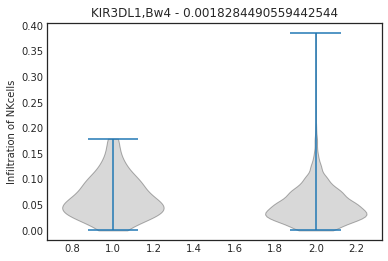

NKcells 36 3465
0.0582432685895 0.0442041399018


<Figure size 432x288 with 0 Axes>

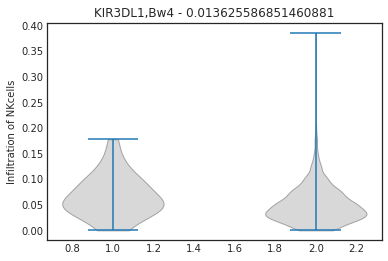

NKcells 119 3382
0.051609558745 0.0441688371362


<Figure size 432x288 with 0 Axes>

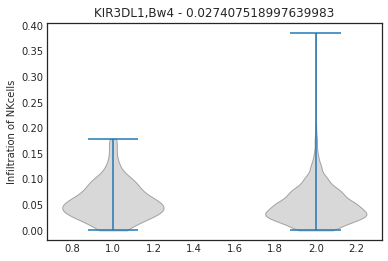

NKcells 119 3382
0.051609558745 0.0441688371362


<Figure size 432x288 with 0 Axes>

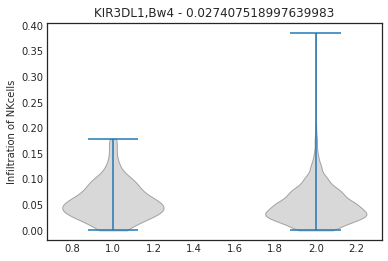

NKcells 32 3469
0.0600503172901 0.0441896569814


<Figure size 432x288 with 0 Axes>

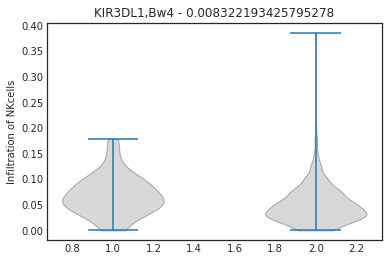

NKcells 34 3467
0.0589990397032 0.0443186980624


<Figure size 432x288 with 0 Axes>

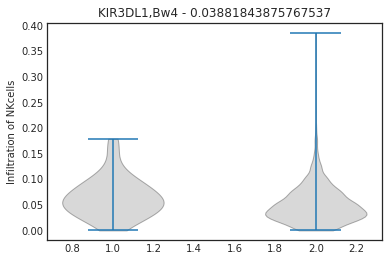

NKcells 119 3382
0.0515231594649 0.0441818149261


<Figure size 432x288 with 0 Axes>

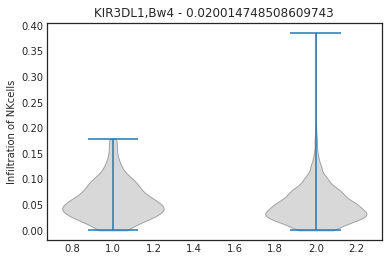

165


<Figure size 432x288 with 0 Axes>

In [51]:
predicted_total = 2
total = 0
cell = 'NKcells'
for hla_allele in hla_a_single_fd:
    for kir_gene in genes:
        hla = (df.A1_ == hla_allele) | (df.A2_ == hla_allele)
        kir = (df[kir_gene] > 0)
        #print len(df[hla&kir]), len(df[~(hla&kir)])
        if len(df[hla&kir][cell]) > 10 and len(df[~(hla&kir)][cell]) > 10:
            total += 1
            test = sp.ttest_ind(df[hla&kir][cell], df[~(hla&kir)][cell])[1]
            #print hla_allele, kir_gene, test
            # test one against all others
            if test * predicted_total < 0.05:
                print cell, len(df[hla&kir]), len(df[~(hla&kir)])
                print df[hla&kir][cell].median(), df[~(hla&kir)][cell].median()
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[hla&kir][cell], df[~(hla&kir)][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                #ax.boxplot([df[inactivating_combo][cell], df[~inactivating_combo][cell]])
                #plt.ylim(0, 0.05)
                plt.ylabel('Infiltration of {0}'.format(cell))
                #ax.set_xticklabels([' ', 'Inactivating - {0}'.format(len(df[inactivating_combo])), ' ', 'Non-inactivating - {0}'.format(len(df[~inactivating_combo]))])
                plt.title('KIR3DL1,Bw4 - {0}'.format(str(test * predicted_total)))
                #plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, 'KIR3DL1', 'Bw4'))
                plt.show()
                plt.clf()
print total

In [52]:
predicted_total = 177
total = 0
cell = 'NKcells'
for hla_allele in hla_b_single_fd:
    for kir_gene in genes:
        hla = (df.B1_ == hla_allele) | (df.B2_ == hla_allele)
        kir = (df[kir_gene] > 1)
        #print len(df[hla&kir]), len(df[~(hla&kir)])
        if len(df[hla&kir][cell]) > 10 and len(df[~(hla&kir)][cell]) > 10:
            total += 1
            test = sp.ttest_ind(df[hla&kir][cell], df[~(hla&kir)][cell])[1]
            #print hla_allele, kir_gene, test
            # test one against all others
            if test * predicted_total < 0.05:
                print cell, len(df[hla&kir]), len(df[~(hla&kir)])
                print df[hla&kir][cell].median(), df[~(hla&kir)][cell].median()
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[hla&kir][cell], df[~(hla&kir)][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                #ax.boxplot([df[inactivating_combo][cell], df[~inactivating_combo][cell]])
                #plt.ylim(0, 0.05)
                plt.ylabel('Infiltration of {0}'.format(cell))
                #ax.set_xticklabels([' ', 'Inactivating - {0}'.format(len(df[inactivating_combo])), ' ', 'Non-inactivating - {0}'.format(len(df[~inactivating_combo]))])
                plt.title('KIR3DL1,Bw4 - {0}'.format(str(test * predicted_total)))
                #plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, 'KIR3DL1', 'Bw4'))
                plt.show()
                plt.clf()
print total

221


NKcells C*14:02 KIR3DL3 103 3398
0.0348904260877 0.0446752893021


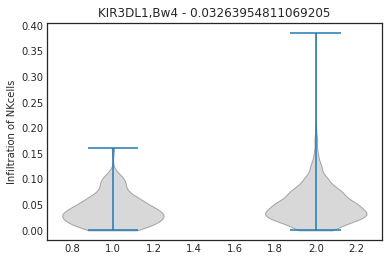

NKcells C*14:02 KIR3DP1 103 3398
0.0348904260877 0.0446752893021


<Figure size 432x288 with 0 Axes>

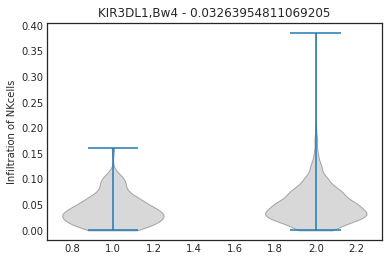

NKcells C*14:02 KIR2DL4 103 3398
0.0348904260877 0.0446752893021


<Figure size 432x288 with 0 Axes>

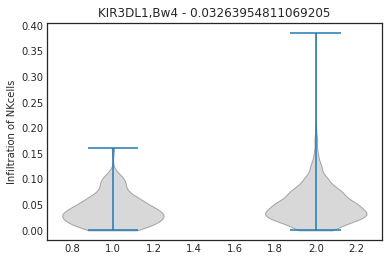

NKcells C*14:02 KIR3DL2 103 3398
0.0348904260877 0.0446752893021


<Figure size 432x288 with 0 Axes>

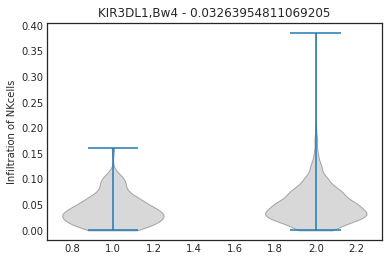

227


<Figure size 432x288 with 0 Axes>

In [53]:
predicted_total = 10
total = 0
cell = 'NKcells'
for hla_allele in hla_c_single_fd:
    for kir_gene in genes:
        hla = (df.C1_ == hla_allele) | (df.C2_ == hla_allele)
        kir = (df[kir_gene] > 0)
        #print len(df[hla&kir]), len(df[~(hla&kir)])
        if len(df[hla&kir][cell]) > 10 and len(df[~(hla&kir)][cell]) > 10:
            total += 1
            test = sp.ttest_ind(df[hla&kir][cell], df[~(hla&kir)][cell])[1]
            #print hla_allele, kir_gene, test
            # test one against all others
            if test * predicted_total < 0.05:
                print cell, hla_allele, kir_gene, len(df[hla&kir]), len(df[~(hla&kir)])
                print df[hla&kir][cell].median(), df[~(hla&kir)][cell].median()
                f, ax = plt.subplots()
                violin_parts = ax.violinplot([df[hla&kir][cell], df[~(hla&kir)][cell]])
                for pc in violin_parts['bodies']:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('black')
                #ax.boxplot([df[inactivating_combo][cell], df[~inactivating_combo][cell]])
                #plt.ylim(0, 0.05)
                plt.ylabel('Infiltration of {0}'.format(cell))
                #ax.set_xticklabels([' ', 'Inactivating - {0}'.format(len(df[inactivating_combo])), ' ', 'Non-inactivating - {0}'.format(len(df[~inactivating_combo]))])
                plt.title('KIR3DL1,Bw4 - {0}'.format(str(test * predicted_total)))
                #plt.savefig('/cellar/users/ramarty/Data/kir/figures/infiltration.hla.{0}.{1}.{2}.pdf'.format(cell, 'KIR3DL1', 'Bw4'))
                plt.show()
                plt.clf()
print total

Activating vs inhibitory

In [54]:
activating = ['KIR2DL4', 'KIR2DS1', 'KIR2DS2', 'KIR2DS3', 'KIR2DS4', 'KIR2DS5', 'KIR3DS1']
inhibitory = ['KIR2DL1', 'KIR2DL2', 'KIR2DL3', 'KIR2DL5A', 'KIR3DL1', 'KIR3DL2', 'KIR3DL3']

In [55]:
df.activating.describe()

count    3501.000000
mean        5.905456
std         2.103447
min         2.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: activating, dtype: float64

In [56]:
low_activating = (df.activating <= 5)
high_activating = (df.activating >= 6)

In [57]:
len(df[low_activating]), len(df[high_activating])

(1714, 1787)

In [58]:
cell = 'NKcells'
sp.ttest_ind(df[low_activating][cell], df[high_activating][cell])[1]

0.7884488030602413

In [59]:
df.inhibitory.describe()

count    3501.000000
mean       11.924307
std         1.430379
min         6.000000
25%        11.000000
50%        12.000000
75%        12.000000
max        20.000000
Name: inhibitory, dtype: float64

In [60]:
low_inhibition = (df.inhibitory <= 10)
high_inhibition = (df.inhibitory >= 12)

In [61]:
len(df[low_inhibition]), len(df[high_inhibition])

(290, 2381)

In [62]:
cell = 'NKcells'
sp.ttest_ind(df[low_inhibition][cell], df[high_inhibition][cell])[1]

0.8632977380786265

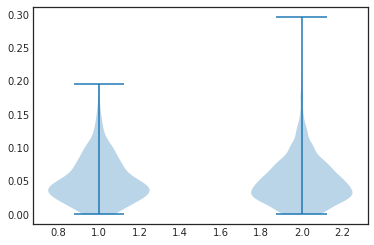

0.0428842441457 0.0443553290927


In [63]:
f, ax = plt.subplots()
ax.violinplot([df[low_inhibition][cell], df[high_inhibition][cell]])
plt.show()
print df[low_inhibition][cell].median(), df[high_inhibition][cell].median() 